<a href="https://colab.research.google.com/github/sdevasya-github/aiml/blob/main/Data_prep_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akram24/position-salaries")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/akram24/position-salaries/versions/1


In [38]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/akram24/position-salaries/versions/1/Position_Salaries.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [40]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [52]:
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [42]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 6]
 [ 1]
 [ 8]
 [ 3]
 [10]
 [ 5]
 [ 4]
 [ 7]]
[[9]
 [2]]
[ 150000   45000  300000   60000 1000000  110000   80000  200000]
[500000  50000]


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have X_train, X_test, y_train, y_test from the previous split

# 1. Create the model
model = LinearRegression()

# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7840057409.334131
R-squared: 0.8451346684575974


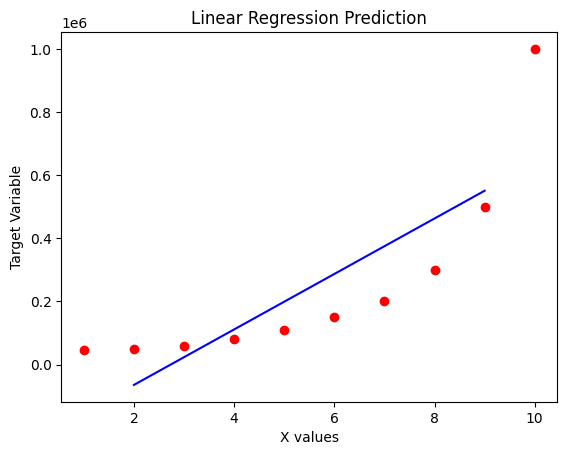

In [45]:
import matplotlib.pyplot as plt

def viz_linear():
    plt.scatter(X, y, color='red')  # Actual data points
    plt.plot(X_test, y_pred, color='blue')  # Predicted regression line
    plt.title('Linear Regression Prediction')
    plt.xlabel('X values')  # Replace with your actual feature name
    plt.ylabel('Target Variable')  # Replace with your target variable name
    plt.show()

# Call the function to create the plot
viz_linear()

In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create polynomial features
poly_features = PolynomialFeatures(degree=4)  # Adjust the degree as needed
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# 2. Create and train the model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# 3. Make predictions
y_pred = poly_model.predict(X_poly_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1444499305.547627
R-squared: 0.9714666803842444


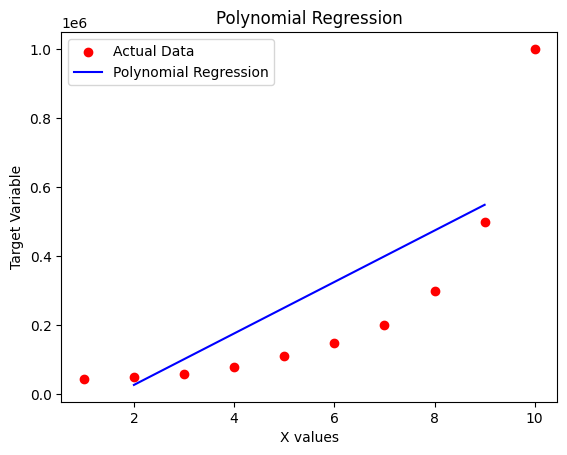

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Sort the test data for smoother plotting
X_test_sorted = np.sort(X_test, axis=0)
X_poly_test_sorted = poly_features.transform(X_test_sorted)

# 2. Generate predictions for the sorted data
y_pred_sorted = poly_model.predict(X_poly_test_sorted)

# 3. Create the plot
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_test_sorted, y_pred_sorted, color='blue', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('X values')  # Replace with your feature name
plt.ylabel('Target Variable')  # Replace with your target variable name
plt.legend()
plt.show()

In [61]:
model.predict([[9]])

array([550732.75862069])

In [65]:
model.predict([[8]])

array([462844.82758621])

In [59]:
poly_model.predict(X_poly_test_sorted)


array([ 27337.4360878 , 548738.14530756])

In [63]:
#For test data use transform
poly_model.predict(poly_features.transform([[9]]))

array([548738.14530756])

In [64]:
#For trained  data prediction use fit_transform
poly_model.predict(poly_features.fit_transform([[8]]))

array([307266.99516187])